# Aerodynamic Roughness Length

In [3]:
import pandas as pd
import numpy as np

# Import the roughness data with semicolon delimiter
file_path = r"H:\_SILVEX II 2025\Data\SILVEX2_Silvia2_roughness_data.CSV"
df = pd.read_csv(file_path, sep=';')

# Inspect the data
print("Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

C:\Users\asemannp\AppData\Local\Temp\ipykernel_14948\1237052145.py:6: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


Shape: (43166, 47)

First few rows:
           date     time wind_speed_1m       wind_dir_1m     u*_1m    TKE_1m  \
0  [yyyy-mm-dd]  [HH:MM]      [m+1s-1]  [deg_from_north]  [m+1s-1]  [m+2s-2]   
1    23.06.2025    11:41       1.22626           132.344  0.244679  0.314451   
2    23.06.2025    11:42       1.79244           137.244  0.144045  0.250917   
3    23.06.2025    11:43       1.14311           101.449  0.294286  0.387258   
4    23.06.2025    11:44      0.829677           107.403  0.172145  0.829051   

      L_1m    (z-d)/L_1m     T*_1m footprintmodel_1m  ...    (z-d)/L_3m  \
0      [m]           [#]       [K]  [0=KJ/1=KM/2=HS]  ...           [#]   
1  6.93142      0.158698   0.66877                 0  ...  0.518070E-01   
2  3.23339      0.340201  0.494071                 1  ...       0.30432   
3   13.481  0.815962E-01  0.497989                 0  ...  0.172188E-01   
4  5.05854      0.217454  0.452787                 1  ...      0.161392   

      T*_3m footprintmodel_3m x_

## 1. Data inspection

Plots of the time series of $\frac{z-d}{L}$, $u*$, and the wind direction for all three sensor levels.

In [7]:
import matplotlib.pyplot as plt

# Clean the data and convert necessary columns to numeric
df_plot = df.iloc[1:].copy()

# Convert columns to numeric
cols_to_convert = ['(z-d)/L_1m', '(z-d)/L_2m', '(z-d)/L_3m', 
                   'wind_dir_1m', 'wind_dir_2m', 'wind_dir_3m']
for col in cols_to_convert:
    df_plot[col] = pd.to_numeric(df_plot[col], errors='coerce')

# Create datetime index for time series plots
df_plot['datetime'] = pd.to_datetime(df_plot['date'] + ' ' + df_plot['time'], format='%d.%m.%Y %H:%M')
df_plot = df_plot.set_index('datetime')

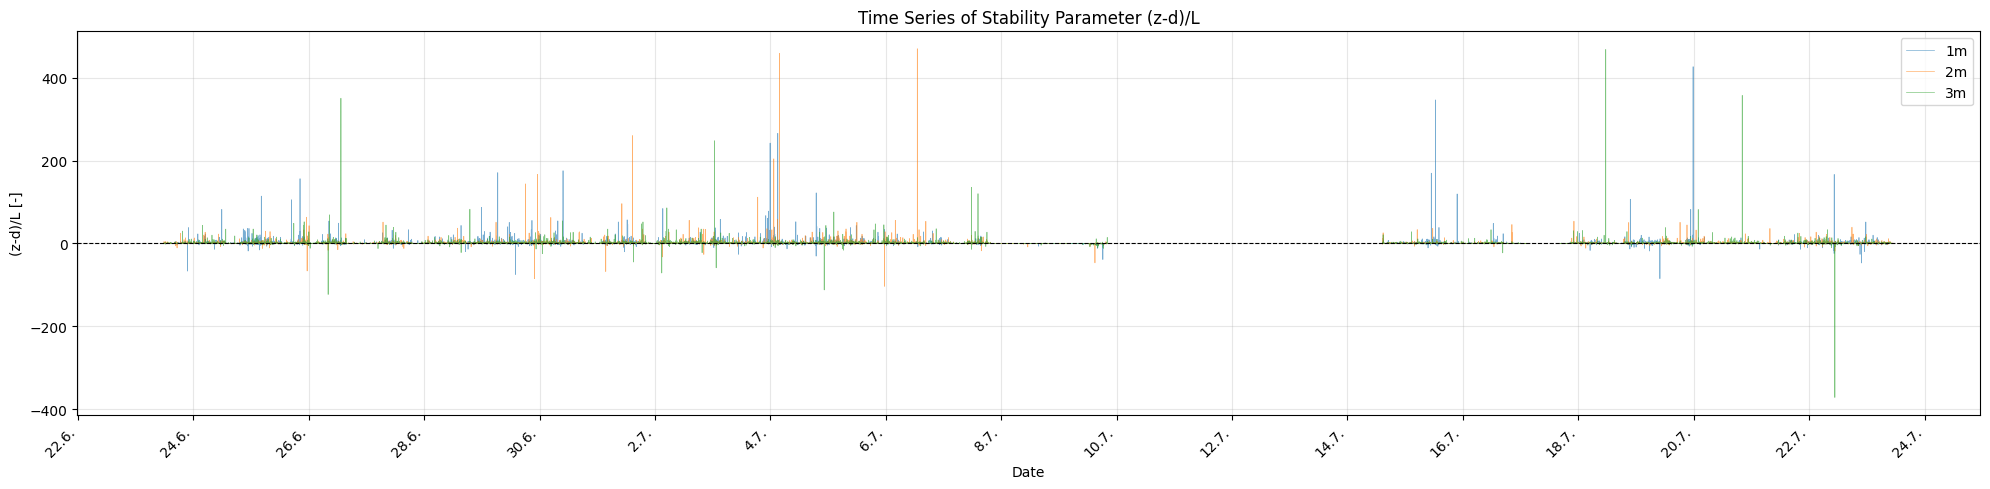

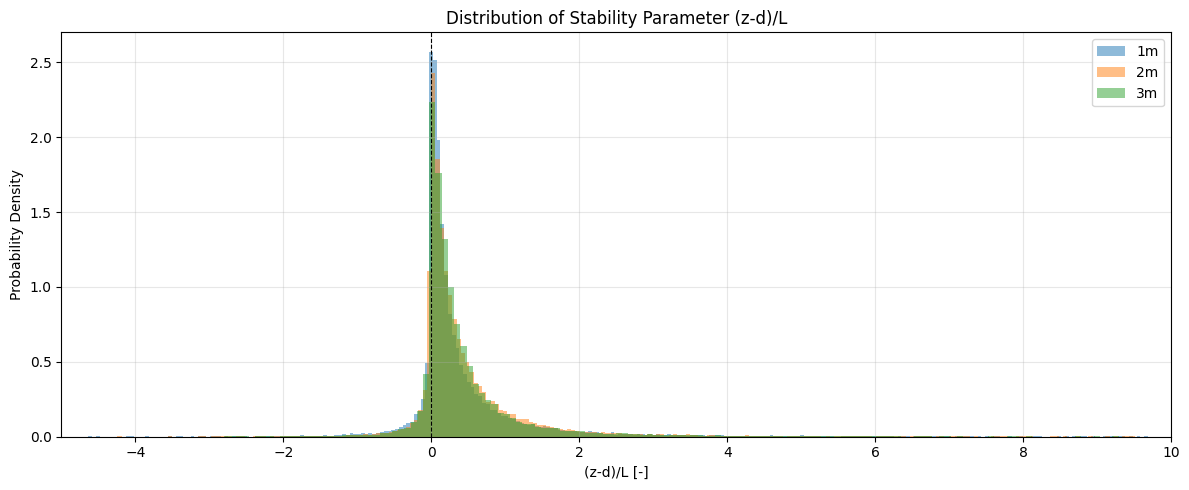

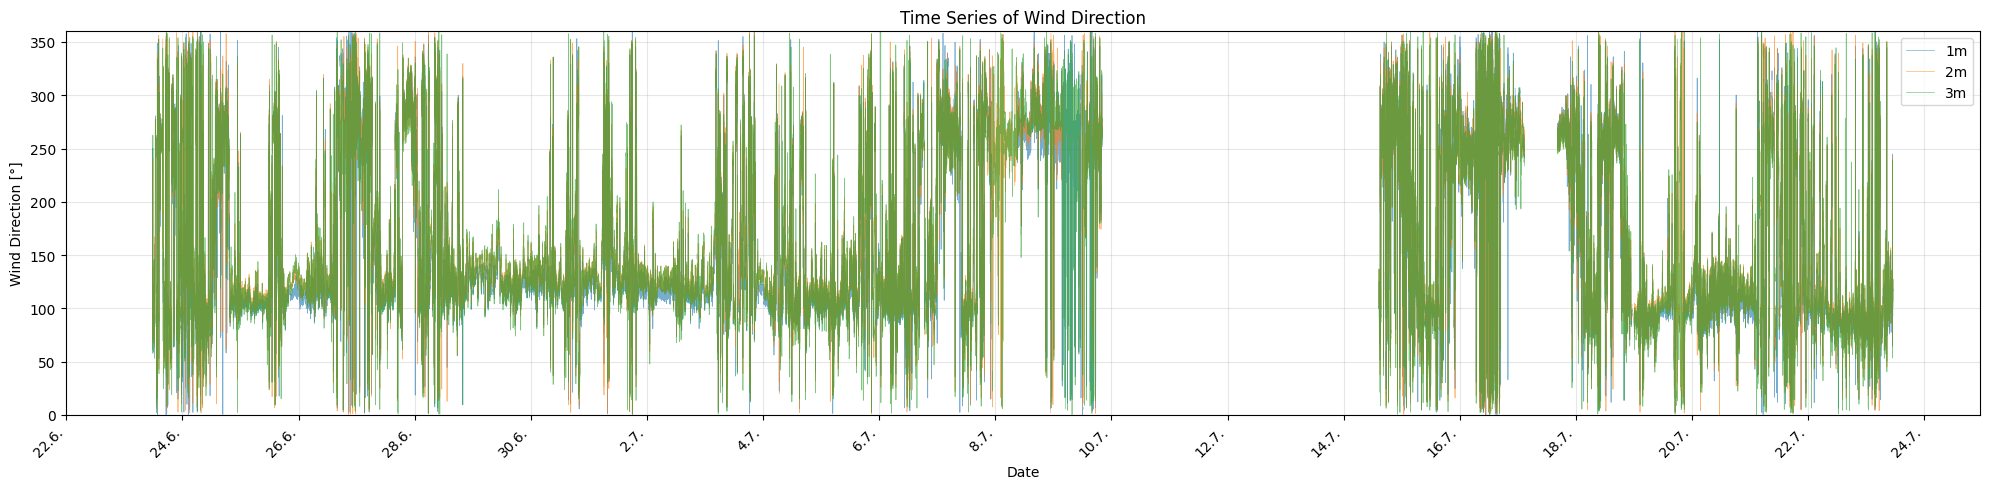

In [14]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Custom formatter to remove leading zeros from month
def custom_date_formatter(x, pos):
    date = mdates.num2date(x)
    return f"{date.day}.{date.month}."

# 1. Time series of stability parameter (z-d)/L
fig1, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(df_plot.index, df_plot['(z-d)/L_1m'], label='1m', alpha=0.6, linewidth=0.5)
ax1.plot(df_plot.index, df_plot['(z-d)/L_2m'], label='2m', alpha=0.6, linewidth=0.5)
ax1.plot(df_plot.index, df_plot['(z-d)/L_3m'], label='3m', alpha=0.6, linewidth=0.5)
ax1.set_ylabel('(z-d)/L [-]')
ax1.set_xlabel('Date')
ax1.set_title('Time Series of Stability Parameter (z-d)/L')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax1.xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
fig1.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Distribution of stability parameter (z-d)/L
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.hist(df_plot['(z-d)/L_1m'].dropna(), bins=10000, alpha=0.5, label='1m', density=True)
ax2.hist(df_plot['(z-d)/L_2m'].dropna(), bins=10000, alpha=0.5, label='2m', density=True)
ax2.hist(df_plot['(z-d)/L_3m'].dropna(), bins=10000, alpha=0.5, label='3m', density=True)
ax2.set_xlabel('(z-d)/L [-]')
ax2.set_ylabel('Probability Density')
ax2.set_title('Distribution of Stability Parameter (z-d)/L')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
ax2.set_xlim(-5, 10)
plt.tight_layout()
plt.show()

# 3. Time series of wind direction
fig3, ax3 = plt.subplots(figsize=(20, 5))
ax3.plot(df_plot.index, df_plot['wind_dir_1m'], label='1m', alpha=0.6, linewidth=0.5)
ax3.plot(df_plot.index, df_plot['wind_dir_2m'], label='2m', alpha=0.6, linewidth=0.5)
ax3.plot(df_plot.index, df_plot['wind_dir_3m'], label='3m', alpha=0.6, linewidth=0.5)
ax3.set_ylabel('Wind Direction [°]')
ax3.set_xlabel('Date')
ax3.set_title('Time Series of Wind Direction')
ax3.set_ylim(0, 360)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
fig3.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
kappa = 0.41 # von Karman constant
z1 = 1.1 # m
z2 = 2.1 # m
z3 = 3.1 # m

In [5]:
# Clean the data: skip first row (units) and convert to numeric
df_clean = df.iloc[1:].copy()

# Convert relevant columns to numeric
for col in ['wind_speed_1m', 'u*_1m', 'wind_speed_2m', 'u*_2m', 'wind_speed_3m', 'u*_3m']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Compute aerodynamic roughness length z_0 for each level
# Formula: u_z = (u* / kappa) * ln(z/z_0)
# Solving for z_0: z_0 = z * exp(-u_z * kappa / u*)

df_clean['z0_1m'] = z1 * np.exp(-df_clean['wind_speed_1m'] * kappa / df_clean['u*_1m'])
df_clean['z0_2m'] = z2 * np.exp(-df_clean['wind_speed_2m'] * kappa / df_clean['u*_2m'])
df_clean['z0_3m'] = z3 * np.exp(-df_clean['wind_speed_3m'] * kappa / df_clean['u*_3m'])

# Display basic statistics for the computed roughness lengths
print("Aerodynamic Roughness Length Statistics:\n")
print(df_clean[['z0_1m', 'z0_2m', 'z0_3m']].describe())
print("\n\nFirst few values:")
print(df_clean[['date', 'time', 'wind_speed_1m', 'u*_1m', 'z0_1m', 
                'wind_speed_2m', 'u*_2m', 'z0_2m',
                'wind_speed_3m', 'u*_3m', 'z0_3m']].head(10))

Aerodynamic Roughness Length Statistics:

              z0_1m         z0_2m         z0_3m
count  3.400800e+04  3.438700e+04  3.475100e+04
mean   3.925731e-02  9.376737e-02  1.763937e-01
std    1.167535e-01  2.448047e-01  4.081551e-01
min    3.225876e-82  3.656275e-75  9.361238e-87
25%    2.658558e-07  5.784661e-06  5.703449e-05
50%    1.742684e-04  1.485336e-03  7.056204e-03
75%    9.902634e-03  4.323023e-02  1.174589e-01
max    1.093301e+00  2.070762e+00  3.010233e+00


First few values:
          date   time  wind_speed_1m     u*_1m     z0_1m  wind_speed_2m  \
1   23.06.2025  11:41       1.226260  0.244679  0.140930       0.976839   
2   23.06.2025  11:42       1.792440  0.144045  0.006694       1.751830   
3   23.06.2025  11:43       1.143110  0.294286  0.223739       0.889658   
4   23.06.2025  11:44       0.829677  0.172145  0.152477       0.517468   
5   23.06.2025  11:45       0.711670  0.189557  0.235985       0.908820   
6   23.06.2025  11:46       0.350830  0.119239  0.329227